We look to compute traveling wave solutions of

\begin{align*}
u_t + 6 uu_x + u_{xxx} = 0.
\end{align*}

We have seen that for $c \in \mathbb R$, we should consider the boundary-value problem

\begin{align*}
 \begin{cases}
 c w'(x) + \sigma w(x) w'(x) + e^{-(\sigma-1)} w'''(x) = 0,\\
 w(0) = w(L),\\
 w'(0) = w'(L),\\
 w''(0) = w''(L).
 \end{cases}
\end{align*}

We are interested in the case where $\sigma = 1$.  But it will be convenient to use this as a continuation parameter.

Instead of considering the periodic boundary conditions, we add appropriate conditions to make a well-posed BVP when $\sigma = 0$: $L = 1$, $c = k^2 \pi^2$:

\begin{align*}
 \begin{cases}
 w'(x) - w'''(x) = 0,\\
 w(0) = 0,\\
 w(L) = 0,\\
     w'(L) = \beta.
 \end{cases}
\end{align*}

We found the exact solution to be $$\frac{\sqrt{\epsilon } e^{-\frac{x}{\sqrt{\epsilon }}} \left(e^{\frac{x}{\sqrt{\epsilon }}}-1\right) \left(e^{\frac{x}{\sqrt{\epsilon }}}-e^{\frac{1}{\sqrt{\epsilon }}}\right)}{e^{\frac{1}{\sqrt{\epsilon }}}-1}$$

In [1]:
using LinearAlgebra, SparseArrays, FiniteDifferences, Plots, Printf,LaTeXStrings

In [2]:
m = 199;
L = 1;
k = 3
β = 1
c = 1
h = L/(m+1); #grid spacing depends on interval length
ϵVals = [0.1,0.01]
xs = h:h:L-h

0.005:0.005:0.995

In [3]:
u = (x,ϵ) -> (sqrt(ϵ)*map(exp,-x/sqrt(ϵ)).*(map(exp,x./sqrt(ϵ)) .- 1.0).*(map(exp,x./sqrt(ϵ)) .- map(exp,1/sqrt(ϵ))))./(exp(1/sqrt(ϵ)) .- 1.0)

#9 (generic function with 1 method)

In [4]:
method = FiniteDifferenceMethod([-1, 0, 1], 1)
display(method)
first = method.coefs |> Vector

FiniteDifferenceMethod:
  order of method:       3
  order of derivative:   1
  grid:                  [-1, 0, 1]
  coefficients:          [-0.5, 0.0, 0.5]


3-element Vector{Float64}:
 -0.5
  0.0
  0.5

In [7]:
method = FiniteDifferenceMethod([-1, 0, 1, 2, 3], 3)
display(method)
left = method.coefs |> Vector

FiniteDifferenceMethod:
  order of method:       5
  order of derivative:   3
  grid:                  [-1, 0, 1, 2, 3]
  coefficients:          [-1.5, 5.0, -6.0, 3.0, -0.5]


5-element Vector{Float64}:
 -1.5
  5.0
 -6.0
  3.0
 -0.5

In [8]:
method = FiniteDifferenceMethod([-2,-1, 0, 1, 2], 3)
display(method)
third = method.coefs |> Vector

FiniteDifferenceMethod:
  order of method:       5
  order of derivative:   3
  grid:                  [-2, -1, 0, 1, 2]
  coefficients:          [-0.5, 1.0, 0.0, -1.0, 0.5]


5-element Vector{Float64}:
 -0.5
  1.0
  0.0
 -1.0
  0.5

In [9]:
method = FiniteDifferenceMethod([-2,-1, 0,1], 1)
display(method)
right = method.coefs |> Vector

FiniteDifferenceMethod:
  order of method:       4
  order of derivative:   1
  grid:                  [-2, -1, 0, 1]
  coefficients:          [0.16666666666666666, -1.0, 0.5, 0.3333333333333333]


4-element Vector{Float64}:
  0.16666666666666666
 -1.0
  0.5
  0.3333333333333333

In [10]:
bD = zeros(m)
D = Tridiagonal(fill(-1.0,m-1), fill(0.0,m), fill(1.0,m-1));
D = sparse(D);
D *= 0.5/h;

In [11]:
bD3 = zeros(m)
D3 = spzeros(m,m)
D3[1,1:4] = left[2:end]
D3[2,1:4] = third[2:end]
D3[end-1,end-3:end] = third[1:end-1]
D3[end,end-2:end] = third[1:end-2]
for i = 3:m-2
   D3[i,i-2:i+2] = third
end
vec = -right[1:2]/right[end]
D3[end,end-1:end] += 0.5*vec
D3 *= 1/h^3

bD3[end] -= 0.5*β*h/right[end]
bD3 *= 1/h^3;

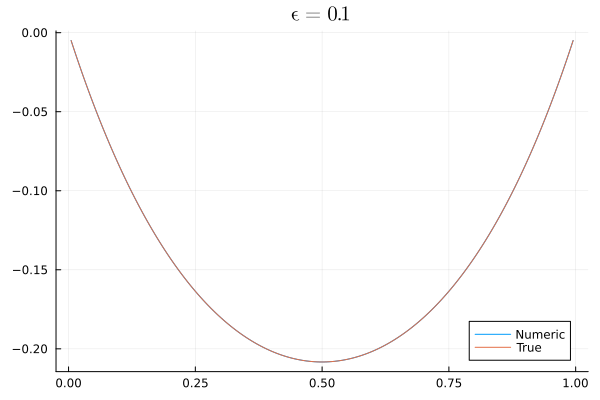

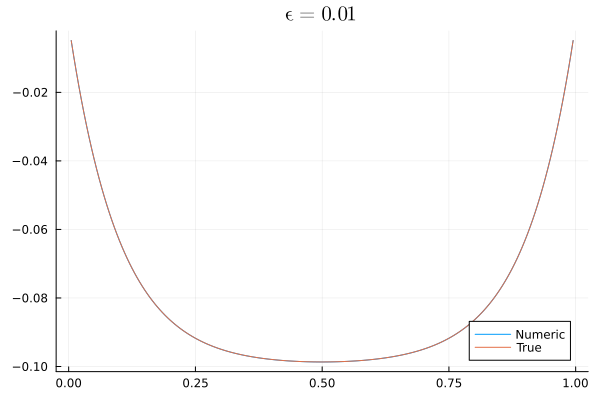

In [15]:
for i=1:length(ϵVals)
    ϵ = ϵVals[i];
    U = (c*D - ϵ*D3)\(c*bD - ϵ*bD3);
    plot(xs,U, label="Numeric")
    display(plot!(xs,u(xs,ϵ),title=L"ϵ=%$ϵ",label="True"))
end

In [14]:
function SolveNonlinear(m,ϵ)
    h = 1/(m+1)
    xs = h:h:L-h
    bD = zeros(m)
    D = Tridiagonal(fill(-1.0,m-1), fill(0.0,m), fill(1.0,m-1));
    D = sparse(D);
    D *= 0.5/h;
    
    bD3 = zeros(m)
    D3 = spzeros(m,m)
    D3[1,1:4] = left[2:end]
    D3[2,1:4] = third[2:end]
    D3[end-1,end-3:end] = third[1:end-1]
    D3[end,end-2:end] = third[1:end-2]
    for i = 3:m-2
       D3[i,i-2:i+2] = third
    end
    vec = -right[1:2]/right[end]
    D3[end,end-1:end] += 0.5*vec
    D3 *= 1/h^3

    bD3[end] -= 0.5*β*h/right[end]
    bD3 *= 1/h^3;
    
    U = (c*D - ϵ*D3)\(c*bD - ϵ*bD3);
    u_true = u(xs, ϵ)
    errors = maximum(abs.(U-u_true))
end

SolveNonlinear (generic function with 1 method)

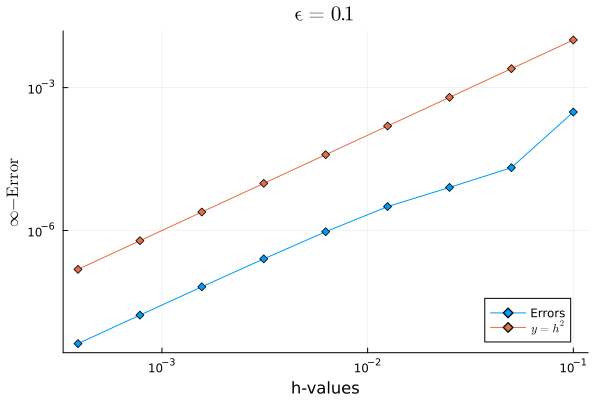

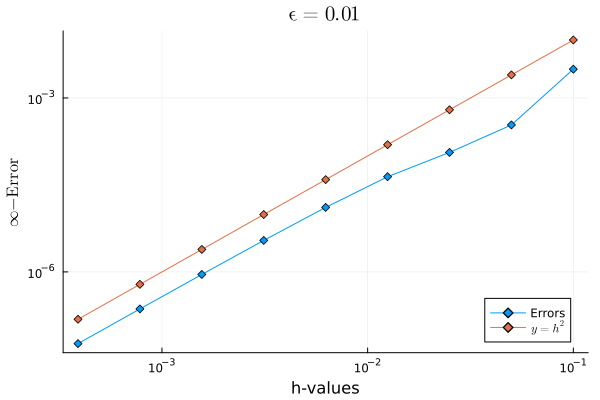

In [22]:
m = 10;
hs = [1/(m*2^j) for j = 0:1:8]
ms = [m*2^j-1 for j = 0:1:8]
for i=1:length(ϵVals)
    ϵ = ϵVals[i];
    erros = [SolveNonlinear(ms[j],ϵ) for j = 1:length(hs)]
    plot(hs,erros,yaxis=:log,xaxis=:log,label="Errors",markershape=:diamond,
    legend =:bottomright, xlabel="h-values",ylabel = L"\infty\mathrm{-Error}", title=L"ϵ =%$ϵ")
    display(plot!(hs,hs.^2,label=L"y = h^2",markershape=:diamond))
    savefig(string(i)*"a2.png")
end